### Import libraries

In [3]:
# For data manipulation
import numpy as np 
import pandas as pd
from sklearn.datasets import make_blobs

# For plotting
import matplotlib.pyplot as plt
import seaborn as sns 
from ipywidgets import interact, interactive, fixed

# For svm modelling
from sklearn.svm import SVC

### Visualize the Dataset

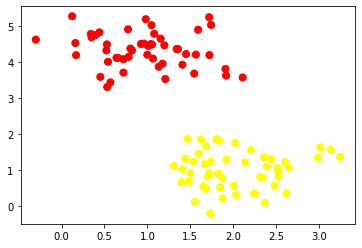

In [4]:
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.5)
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap='autumn')

In [5]:
dt = np.concatenate((X, y.reshape(-1,1)), axis=1)

In [6]:
dt

array([[ 3.1368855 ,  1.56592763,  1.        ],
       [ 1.4815332 ,  0.67875364,  1.        ],
       [ 0.3498724 ,  4.69253251,  0.        ],
       [ 0.5323772 ,  3.31338909,  0.        ],
       [ 2.64928242,  1.05613497,  1.        ],
       [ 1.2091013 ,  3.53566548,  0.        ],
       [ 0.99914934,  4.2101954 ,  0.        ],
       [ 3.01673853,  1.63792106,  1.        ],
       [ 0.78260667,  4.15263595,  0.        ],
       [ 1.65356269,  0.55288877,  1.        ],
       [ 0.802314  ,  4.38196181,  0.        ],
       [ 1.8706766 ,  0.77797407,  1.        ],
       [ 1.08040757,  4.79210685,  0.        ],
       [ 0.5226209 ,  4.32976003,  0.        ],
       [ 1.92126584,  1.29889186,  1.        ],
       [ 3.24683991,  1.3699034 ,  1.        ],
       [ 2.61858548,  0.35769791,  1.        ],
       [ 0.64003985,  4.12401075,  0.        ],
       [ 1.39731382,  0.66687136,  1.        ],
       [ 1.67030948,  1.16728826,  1.        ],
       [ 1.05374379,  4.49286859,  0.   

In [7]:
df = pd.DataFrame(dt, columns=['x1', 'x2', 'y'])
df

,x1,x2,y
0,3.136885,1.565928,1.0
1,1.481533,0.678754,1.0
2,0.349872,4.692533,0.0
3,0.532377,3.313389,0.0
4,2.649282,1.056135,1.0
...,...,...,...
95,-0.300225,4.630597,0.0
96,1.733458,-0.214038,1.0
97,2.529978,0.941439,1.0
98,0.169321,4.197417,0.0


### Data Separator

(-1.0, 3.5)

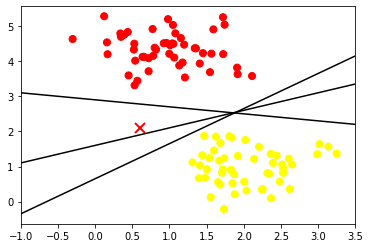

In [8]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5)

### Plot the Margin

(-1.0, 3.5)

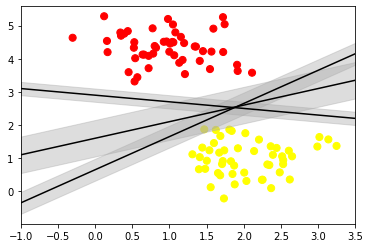

In [9]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5)

### Fitting SVM

In [10]:
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)

SVC(C=10000000000.0, kernel='linear')

### Plot the Fitting Data

In [11]:
# buat sebuah fungsi untuk menampilkan fitting data

def plot_svc_decision_function(model, ax=None, plot_support=True):
    
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # buat grid untuk evaluasi model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot batas dan margin
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

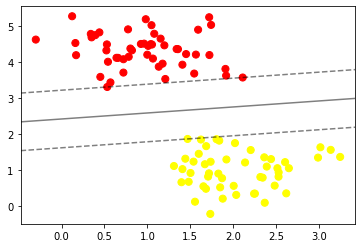

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(model)

In [13]:
# untuk mengetahui data yang masuk ke dalam support vector dapat dilakukan dengan memanggil support_vectors_

model.support_vectors_

array([[0.5323772 , 3.31338909],
       [2.11114739, 3.57660449],
       [1.46870582, 1.86947425]])

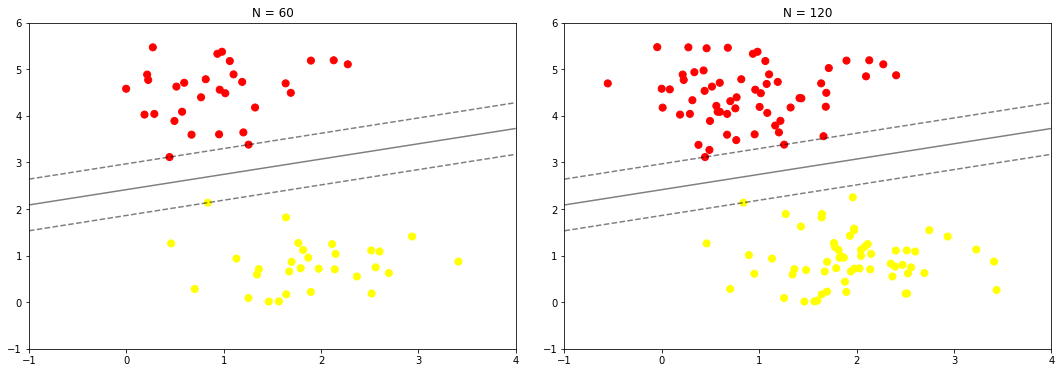

In [14]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

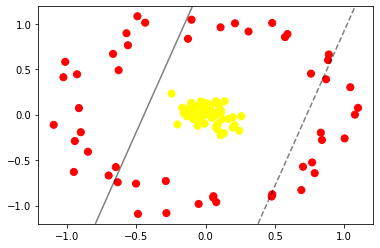

In [15]:
# contoh data tidak terpisah secara linier

from sklearn.datasets import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

In [16]:
r = np.exp(-(X ** 2).sum(1))

In [17]:
from mpl_toolkits import mplot3d

def plot_3D(elev=30, azim=30, X=X, y=y):
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap='autumn')
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('r')

interact(plot_3D, elev=[-90, 45, 30, 20 , 10], azip=(-180, 180),
         X=fixed(X), y=fixed(y))

interactive(children=(Dropdown(description='elev', index=2, options=(-90, 45, 30, 20, 10), value=30), IntSlide…

<function __main__.plot_3D(elev=30, azim=30, X=array([[ 3.09412329e-01,  9.13655662e-01],
       [-6.69273619e-01,  6.67776188e-01],
       [ 7.87184826e-01, -6.42844111e-01],
       [ 2.85066370e-02,  2.45895592e-03],
       [-4.37297139e-01,  1.01093760e+00],
       [-5.03206826e-01, -7.58008337e-01],
       [ 6.33202225e-02, -1.27543654e-02],
       [ 6.41008611e-02,  1.98866242e-02],
       [ 5.72992661e-01,  8.52320709e-01],
       [-4.89479408e-01, -1.09123870e+00],
       [-1.02780894e-01,  1.04356736e+00],
       [-3.75250715e-02,  1.43502209e-01],
       [ 1.30337202e-01, -2.03739586e-01],
       [ 9.53841386e-02,  9.28362573e-02],
       [ 6.90881364e-01, -8.29190204e-01],
       [ 2.08989644e-01, -1.16074411e-01],
       [ 1.08396380e-01, -2.27405373e-01],
       [ 4.80373542e-01, -8.76227843e-01],
       [-2.97923215e-02, -6.14234056e-02],
       [-1.58453329e-01,  1.63646902e-02],
       [-2.52471365e-02, -2.08054756e-02],
       [ 7.68517372e-01, -5.25243633e-01],
       

In [18]:
clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

SVC(C=1000000.0)

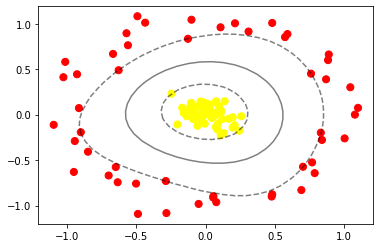

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none')

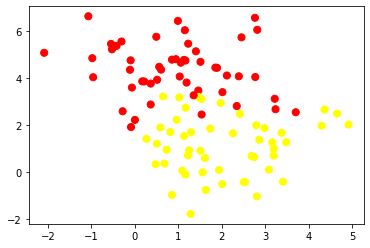

In [20]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=1.2)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

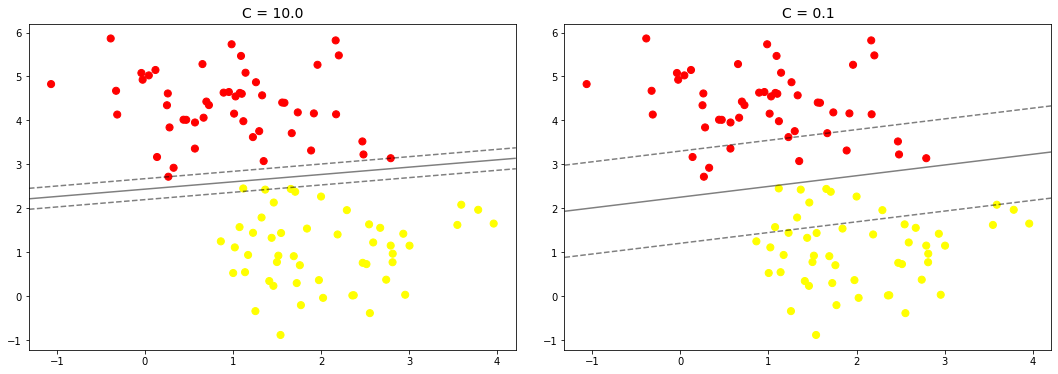

In [21]:
X, y = make_blobs(n_samples=100, centers=2,
                  random_state=0, cluster_std=0.8)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axi, C in zip(ax, [10.0, 0.1]):
    model = SVC(kernel='linear', C=C).fit(X, y)
    axi.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    plot_svc_decision_function(model, axi)
    axi.scatter(model.support_vectors_[:, 0],
                model.support_vectors_[:, 1],
                s=300, lw=1, facecolors='none');
    axi.set_title('C = {0:.1f}'.format(C), size=14)